In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Problem Objectives**


---


 The goal of the project is to develop a Convolutional Neural Network (CNN) model, that can accurately recognize and classify handwritten English alphabets from A to Z based on the provided images. The chosen model will aim to learn the patterns and features in the images to make predictions about which alphabet is written. Additionally, it will also provide a user-friendly Graphical User Interface (GUI) for character input and prediction results.   

# Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from keras.utils import to_categorical

#For the Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

# To dowload the saved model file to use it later for GUI
from IPython.display import FileLink

# **2. Approach**
---



#*A. Dataset*






A_Z Handwritten Dataset: https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format




The dataset contains 372,450 rows, each representing an image of a character. There are 784 columns, representing the pixel values of 28x28 images.

Significance of Features: In this dataset, the features are the pixel values of the 28x28 images. The significance of each pixel depends on the specific style of handwriting in the images. Certain pixels may contain critical information for distinguishing between different characters, while others may be less important.The model is expected to learn the relevant features during the training process.

The dataset the data is numerical and represents pixel values of images, making it image-based data.


# *B. Preprocessing*


# 1. Data Loading

In [ ]:
#Read the datafile
data = pd.read_csv('/content/drive/My Drive/Sys6213/Project/A_Z Handwritten Data.csv').astype('float32')

In [ ]:
# print the shape dimensions of the data
print("Number of Rows:", data.shape[0]) #represents the characters (0-25)
print("Number of Columns:", data.shape[1]) #represents the Pixel values of a 28x28 image


Number of Rows: 372450
Number of Columns: 785


In [ ]:
# Display data types and representation of features
data_info = data.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB
None


# 2. Missing Values

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
# List of features/columns in the dataset that have missing values
missing_values =  missing_values[missing_values > 0]
# Display missing values and their counts
print("Missing values: ", missing_values)

Missing values:  Series([], dtype: int64)


This dataset does not have any missing values because the entire dataset consists of images and labels. Images are represented as complete 28x28 pixel grids with values for each pixel. Encoded labels ensure that each image is associated with one of the 26 alphabet characters.Therefore, there is no need for imputation techniques or filling missing values in this dataset.

In [ ]:
#Drop '0' column to get the features
X = data.drop('0',axis = 1)
#Drop '0' column as target labels
y = data['0']

# 3. Data Splitting

**Data Splitting:**

Split the data into training and testing sets. The training set contains 80% of the data, and the testing set contains 20%.

**Reshape Data:**

Since the dataset is originally in table format, the code reshapes the data to match the input shape required for a neural network model. It converts the data into 28x28 images. The training and testing data are reshaped to have the shapes (297960, 28, 28) and (74490, 28, 28) respectively.

In [ ]:
# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

#Reshape the training and testing data to 28x28 pixels
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

#Print the shapes of the training and testing
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


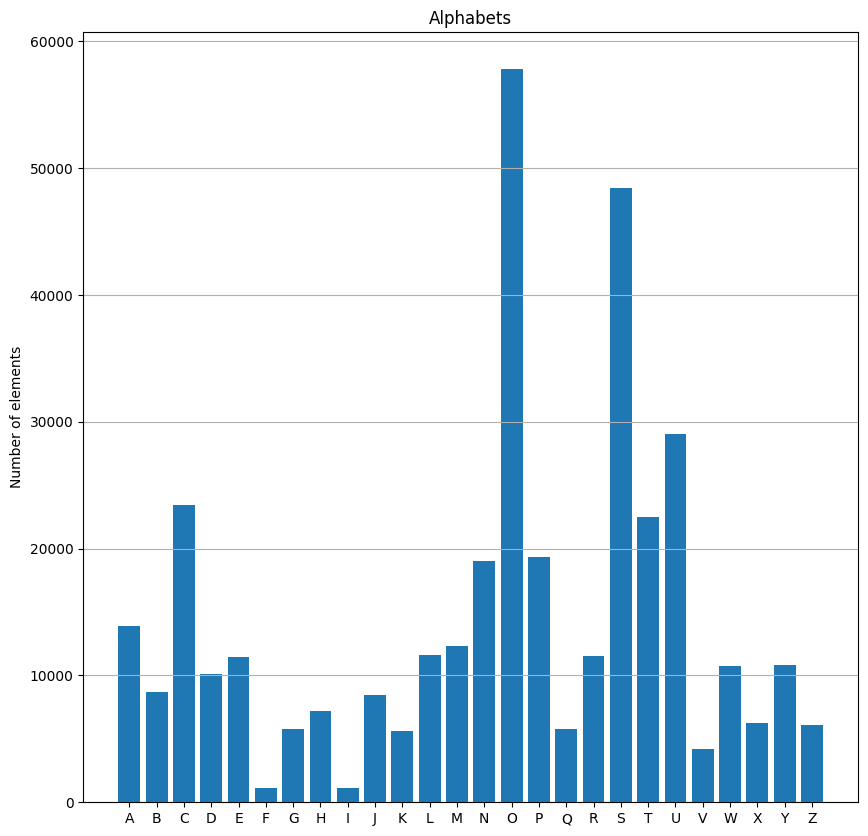

In [ ]:
#code taken from: https://data-flair.training/blogs/handwritten-character-recognition-neural-network/

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',
             11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',
             20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

# Initialize variables
y_int = np.int0(y)
count = np.zeros(26, dtype='int')

#Count the occurrences of each character
for i in y_int:
    count[i] += 1

#Create a list of alphabets
alphabets = []
for i in word_dict.values():
    alphabets.append(i)

#Create the plot to see number of alphabets
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.bar(alphabets, count)
plt.title("Alphabets")
plt.ylabel("Number of elements")
plt.grid(axis='y')
plt.show()

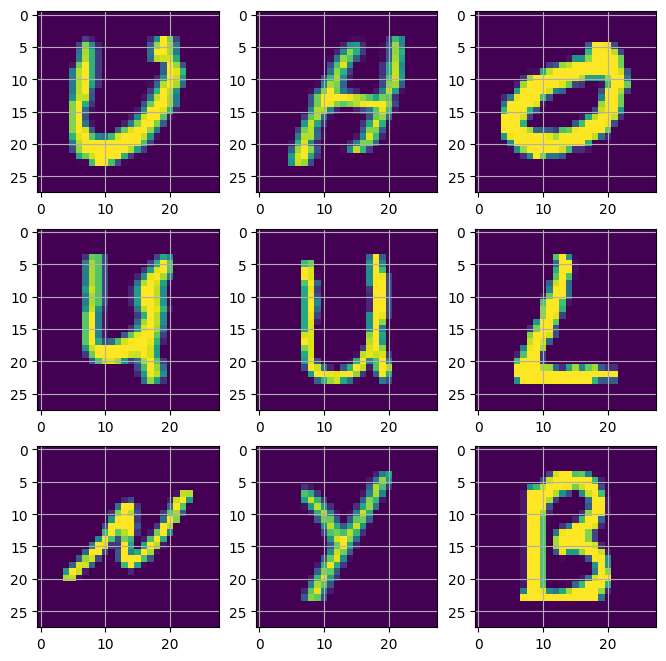

In [ ]:
# 9 random from the training dataset
random_indices = random.sample(range(len(train_x)), 9)

# Create a 3x3 grid to display the random images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

# Flatten the grid
axes = axes.flatten()

# Iterate through the indices and display the images
for i, idx in enumerate(random_indices):
    axes[i].imshow(train_x[idx])
    axes[i].grid()

# Show the plot with random images
plt.show()

# 4. Reshaping Data

In [ ]:
#code inspired from: https://data-flair.training/blogs/handwritten-character-recognition-neural-network/

# Reshape the train and test image dataset to feed it to the model
SIZE = 28  # image size
newtrain_x = np.array(train_x).reshape(-1, SIZE, SIZE, 1)  # increasing one dimension for kernel
newtest_x = np.array(test_x).reshape(-1, SIZE, SIZE, 1)

# Print the new shape of the training and testing data
print("New shape of train data: ", newtrain_x.shape)
print("New shape of test data: ", newtest_x.shape)

# Expected input shape for the CNN model
input_shape = (SIZE, SIZE, 1)

# Validate input shapes
assert newtrain_x.shape[1:] == input_shape, f"Expected {input_shape}, but got {newtrain_x.shape[1:]}"
assert newtest_x.shape[1:] == input_shape, f"Expected {input_shape}, but got {newtest_x.shape[1:]}"


New shape of train data:  (297960, 28, 28, 1)
New shape of test data:  (74490, 28, 28, 1)


# 5. Normalization
Normalize the pixel values in the images by dividing them by 255. This step scales the pixel values to the range [0, 1], for image processing tasks.


In [ ]:
#Downsampling the values
newtrain_x = newtrain_x/255.
newtest_x = newtest_x/255.

# 6. One-Hot Encoding
To prepare the labels for the CNN model, one-hot encoding   is used to convert the single integer labels into categorical values. This is necessary for multi-class classification tasks where each class (alphabet character) is represented as a binary vector.

In [ ]:
# Code from: https://github.com/Arnav1145/Handwritten-Character-Recognition/tree/main

#Convert the single float values to categorical values
categorical_train = to_categorical(train_y, num_classes = 26, dtype='int')
categorical_test = to_categorical(test_y, num_classes = 26, dtype='int')

#Print the shapes of the categorical labels
print("New shape of train labels: ", categorical_train.shape)
print("New shape of test labels: ", categorical_test.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


# *C. Model Development*

**Base Model**

Reference ([Paper](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9898675)):

> Z. Liu, "Handwritten Character Recognition Based
on Convolution Neural Network Models," CIBDA
2022; 3rd International Conference on Computer Information and Big Data Applications, Wuhan China, 2022, pp. 1-5.







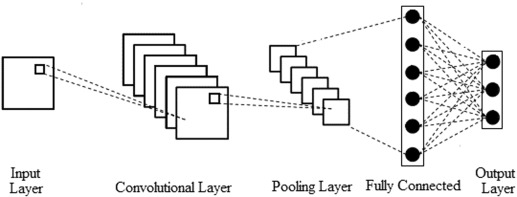


```
model_1 = Sequential()
# First Convolution layer
model_1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(26, activation='softmax'))
```



Base Model Epoch = 10

Base Model Batch Size = 16

Base Model Test Accuracy: 99.15%

**New Model:**

Inspired by a [Research paper](https://www.researchgate.net/publication/306081277_The_Effects_of_Regularization_on_Learning_Facial_Expressions_with_Convolutional_Neural_Networks):

Hinz, T., Barros, P., & Wermter, S. (2016). The Effects of Regularization on Learning Facial Expressions with Convolutional Neural Networks

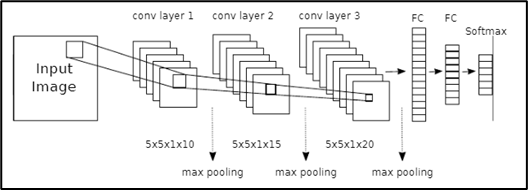

In [ ]:
#Create the model
model = Sequential()

# First Convolution layer
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Second Convolution layer
model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Third Convolution layer
model.add(Conv2D(128, (3, 3), padding = 'valid'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# 1st Fully connected layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dropout(0.2))

# 2nd Fully connected layer
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dropout(0.2))

# Last layer for classification
model.add(Dense(26))
model.add(Activation("softmax"))

#Display a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                   

In [ ]:
#Compile the model
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [ ]:
# Monitors the validation loss and stops training if no improvement is observed for 5 consecutive epochs.
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=0.001)

#Save the best model based on validation accuracy
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
# Fit the model
history = model.fit(newtrain_x, categorical_train, epochs=25, batch_size = 32, callbacks=[es,mc], validation_data=(newtest_x, categorical_test))

Epoch 1/25
9311/9312 [============================>.] - ETA: 0s - loss: 0.1874 - accuracy: 0.9481
Epoch 1: val_accuracy improved from -inf to 0.98310, saving model to best_model.h5
9312/9312 [==============================] - 432s 46ms/step - loss: 0.1874 - accuracy: 0.9481 - val_loss: 0.0622 - val_accuracy: 0.9831
Epoch 2/25
   2/9312 [..............................] - ETA: 9:27 - loss: 0.0870 - accuracy: 0.9688

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9312/9312 [==============================] - ETA: 0s - loss: 0.0719 - accuracy: 0.9812
Epoch 2: val_accuracy improved from 0.98310 to 0.98777, saving model to best_model.h5
9312/9312 [==============================] - 423s 45ms/step - loss: 0.0719 - accuracy: 0.9812 - val_loss: 0.0442 - val_accuracy: 0.9878
Epoch 3/25
9311/9312 [============================>.] - ETA: 0s - loss: 0.0549 - accuracy: 0.9854
Epoch 3: val_accuracy improved from 0.98777 to 0.98946, saving model to best_model.h5
9312/9312 [==============================] - 423s 45ms/step - loss: 0.0549 - accuracy: 0.9854 - val_loss: 0.0421 - val_accuracy: 0.9895
Epoch 4/25
9310/9312 [============================>.] - ETA: 0s - loss: 0.0457 - accuracy: 0.9877
Epoch 4: val_accuracy did not improve from 0.98946
9312/9312 [==============================] - 423s 45ms/step - loss: 0.0457 - accuracy: 0.9877 - val_loss: 0.0397 - val_accuracy: 0.9893
Epoch 5/25
9310/9312 [============================>.] - ETA: 0s - loss: 0.0407 - accur

In [ ]:
#dowloading the model file to use it later for GUI
# Assuming 'best_model.h5' is the filename you used in ModelCheckpoint
file_path = 'best_model.h5'
FileLink(file_path)

/content/best_model.h5

# **3. Results**


---



In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(newtest_x, categorical_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


2328/2328 [==============================] - 33s 14ms/step - loss: 0.0375 - accuracy: 0.9919
Test Accuracy: 99.19%


Text(0.5, 1.0, 'Training and Testing Accuracy')

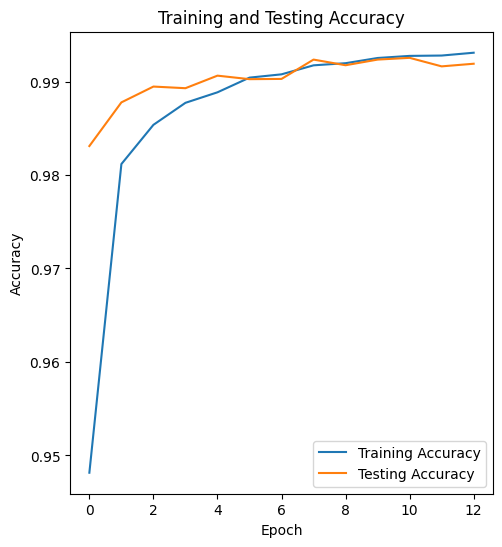

In [ ]:
#plot the model accuracy

# Extract loss and accuracy history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Testing Accuracy')

Text(0.5, 1.0, 'Training and Testing Loss')

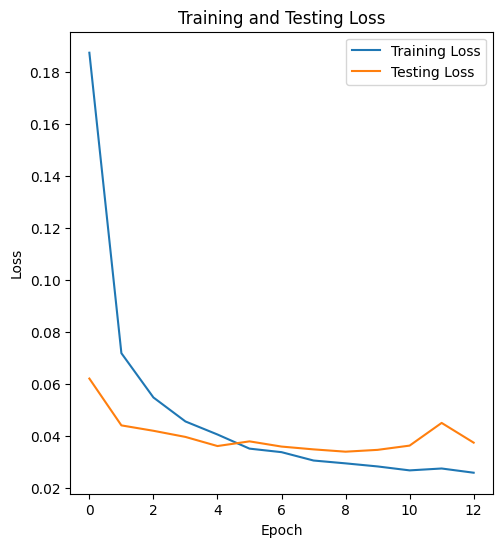

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Testing Loss')

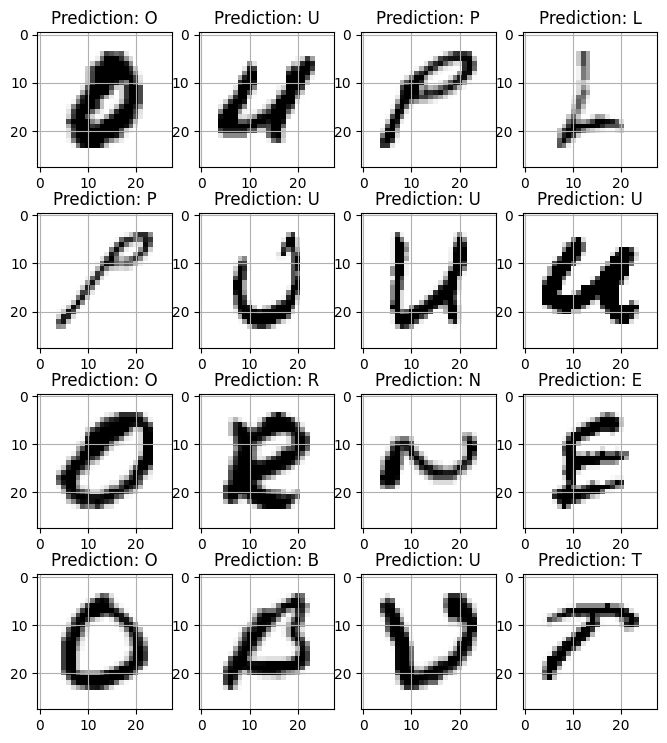

In [ ]:
#Predictions on test data
fig, axes = plt.subplots(4,4, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    #reshape the test image data for visulization
    img = np.reshape(newtest_x[i], (28,28))

    #image in grey scale image
    ax.imshow(img, cmap="Greys")

    #get the predicted character label
    pred = word_dict[np.argmax(categorical_test[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()